<a href="https://colab.research.google.com/github/Raviteja1269/Project1/blob/main/project001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

# Function to scrape CNBC website for headlines and dates
def scrape_cnbc():
    url = 'https://www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    articles = soup.find_all('div', class_='SearchResultCard')

    headlines = []
    dates = []

    for article in articles:
        headline = article.find('a', class_='Card-title').text.strip()
        date = article.find('time')['datetime']
        date = datetime.strptime(date, '%Y-%m-%dT%H:%M:%SZ').date()

        headlines.append(headline)
        dates.append(date)

    return headlines, dates

# Scrape CNBC website
cnbc_headlines, cnbc_dates = scrape_cnbc()

# Store data in pandas DataFrame
cnbc_df = pd.DataFrame({'Date': cnbc_dates, 'Headline': cnbc_headlines, 'Source': 'CNBC'})
print(cnbc_df.head())


Empty DataFrame
Columns: [Date, Headline, Source]
Index: []


In [3]:
!pip install feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=db01356b65630ef636389bd2352cb1b62b2c11d375e253e3fe6f40389b996216
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [6]:
import feedparser
import datetime
import time
import pandas as pd

# Function to fetch news headlines from Google News RSS feed
def fetch_google_news():
    url = 'https://news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en'
    feed = feedparser.parse(url)

    headlines = []
    dates = []

    for entry in feed.entries:
        headline = entry.title
        date = entry.published_parsed
        date = datetime.datetime.fromtimestamp(time.mktime(date)).date()

        headlines.append(headline)
        dates.append(date)

    return headlines, dates

# Fetch news from Google News RSS feed
google_news_headlines, google_news_dates = fetch_google_news()

# Store data in pandas DataFrame
google_news_df = pd.DataFrame({'Date': google_news_dates, 'Headline': google_news_headlines, 'Source': 'Google News'})
print(google_news_df.head())


         Date                                           Headline       Source
0  2024-02-05  Govt allocates Rs 455 crore for green hydrogen...  Google News
1  2024-02-07                     Press Information Bureau - PIB  Google News
2  2024-02-07  Govt devising policies to boost green hydrogen...  Google News
3  2024-02-06  India's first green hydrogen fuel cell bus sho...  Google News
4  2024-02-06  Envision Energy Partners with BASF to Boost Gr...  Google News


In [7]:
from transformers import pipeline

# Load pre-trained sentiment analysis model
sentiment_analysis = pipeline('sentiment-analysis')

# Function to calculate sentiment score
def calculate_sentiment_score(text):
    result = sentiment_analysis(text)
    return result[0]['score']

# Add sentiment score column to the DataFrame
cnbc_df['Sentiment Score'] = cnbc_df['Headline'].apply(calculate_sentiment_score)
google_news_df['Sentiment Score'] = google_news_df['Headline'].apply(calculate_sentiment_score)

print(cnbc_df.head())
print(google_news_df.head())


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Empty DataFrame
Columns: [Date, Headline, Source, Sentiment Score]
Index: []
         Date                                           Headline       Source  \
0  2024-02-05  Govt allocates Rs 455 crore for green hydrogen...  Google News   
1  2024-02-07                     Press Information Bureau - PIB  Google News   
2  2024-02-07  Govt devising policies to boost green hydrogen...  Google News   
3  2024-02-06  India's first green hydrogen fuel cell bus sho...  Google News   
4  2024-02-06  Envision Energy Partners with BASF to Boost Gr...  Google News   

   Sentiment Score  
0         0.859762  
1         0.883395  
2         0.913458  
3         0.975321  
4         0.998004  


In [8]:
# Load pre-trained NER model
ner_model = pipeline('ner')

# Function to extract organization names
def extract_organizations(text):
    entities = ner_model(text)
    organizations = [entity['word'] for entity in entities if entity['entity'] == 'ORG']
    return organizations

# Add organization names column to the DataFrame
cnbc_df['Organizations'] = cnbc_df['Headline'].apply(extract_organizations)
google_news_df['Organizations'] = google_news_df['Headline'].apply(extract_organizations)

print(cnbc_df.head())
print(google_news_df.head())


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Empty DataFrame
Columns: [Date, Headline, Source, Sentiment Score, Organizations]
Index: []
         Date                                           Headline       Source  \
0  2024-02-05  Govt allocates Rs 455 crore for green hydrogen...  Google News   
1  2024-02-07                     Press Information Bureau - PIB  Google News   
2  2024-02-07  Govt devising policies to boost green hydrogen...  Google News   
3  2024-02-06  India's first green hydrogen fuel cell bus sho...  Google News   
4  2024-02-06  Envision Energy Partners with BASF to Boost Gr...  Google News   

   Sentiment Score Organizations  
0         0.859762            []  
1         0.883395            []  
2         0.913458            []  
3         0.975321            []  
4         0.998004            []  


In [9]:
# Store DataFrames to CSV files
cnbc_df.to_csv('cnbc_headlines.csv', index=False)
google_news_df.to_csv('google_news_headlines.csv', index=False)

<ipython-input-34-96188af62edf>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sentiment = combined_df.groupby(combined_df['Date'].dt.to_period('W')).mean()


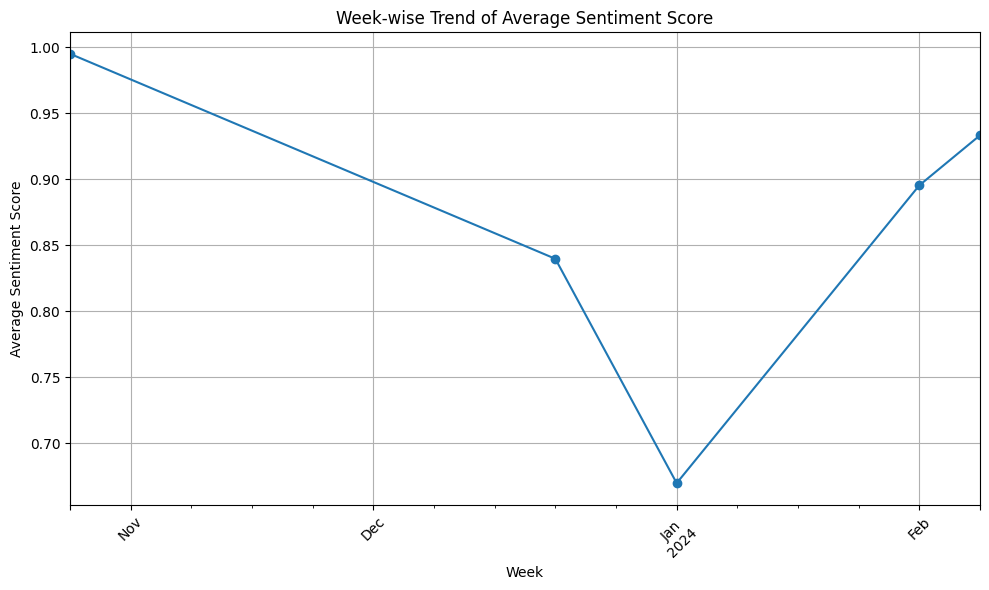

In [34]:
import matplotlib.pyplot as plt

# Combine both DataFrames
combined_df = pd.concat([cnbc_df, google_news_df])

# Convert date column to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Group by week and calculate average sentiment score
weekly_sentiment = combined_df.groupby(combined_df['Date'].dt.to_period('W')).mean()

# Plotting
plt.figure(figsize=(10, 6))
weekly_sentiment['Sentiment Score'].plot(kind='line', marker='o')
plt.title('Week-wise Trend of Average Sentiment Score')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
